In [1]:
import re
import cv2 
import numpy as np
import glob  as gb
import pandas   as pd
import seaborn  as sea
import matplotlib.pyplot as plt

# Analise

### Benigno com e sem marks

In [2]:
marks = sorted(gb.glob(f"Dataset_BUSI_with_GT/*/*_mask.png"))
raioX = sorted(gb.glob(f"Dataset_BUSI_with_GT/*/*).png"))

In [15]:
dataset = pd.DataFrame({
    "TipoDaFoto":[re.findall('\/(.*?)\/',string)[0] for string in raioX],
    "NomeDaFoto":[string.split('/')[2] for string in raioX],
    "RaioX": raioX,
    "Marks": marks
})
dataset.head(3)

,TipoDaFoto,NomeDaFoto,RaioX,Marks
0,benign,benign (1).png,Dataset_BUSI_with_GT/benign/benign (1).png,Dataset_BUSI_with_GT/benign/benign (1)_mask.png
1,benign,benign (10).png,Dataset_BUSI_with_GT/benign/benign (10).png,Dataset_BUSI_with_GT/benign/benign (10)_mask.png
2,benign,benign (100).png,Dataset_BUSI_with_GT/benign/benign (100).png,Dataset_BUSI_with_GT/benign/benign (100)_mask.png


In [4]:
path = dataset['RaioX'].loc[dataset['TipoDaFoto']=='benign'][0]

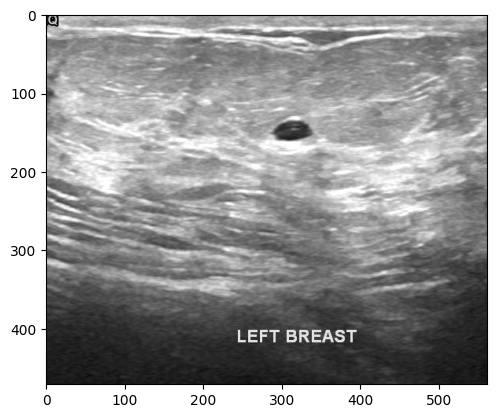

In [5]:
image = cv2.imread(path)
image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

plt.imshow(image,cmap='gray')
plt.show()

### Analisando Imagens

In [40]:
dadosImagens = {
                'Nome'    :[], 
                'TamanhoX':[],
                'TamanhoY':[],
                'Media'   :[],
                'Max'     :[],
                'Min'     :[],     
                }


for path in dataset['RaioX'].values:
    image = cv2.imread(path)
    nome  = dataset['NomeDaFoto'].loc[dataset['RaioX'] == path].values[0] 

    dadosImagens['TamanhoX'].append(image.shape[0])
    dadosImagens['TamanhoY'].append(image.shape[1])

    dadosImagens['Nome'   ].append(nome)
    dadosImagens['Media'  ].append(image.mean())
    dadosImagens['Min'    ].append(image.min())
    dadosImagens['Max'    ].append(image.max())



In [41]:
dataImagens = pd.DataFrame(dadosImagens)

In [42]:
dataImagens

,Nome,TamanhoX,TamanhoY,Media,Max,Min
0,benign (1).png,471,562,132.375146,255,0
1,benign (10).png,585,683,103.240733,255,0
2,benign (100).png,473,323,90.107849,255,0
3,benign (101).png,473,563,103.225690,255,0
4,benign (102).png,610,634,54.337482,243,0
...,...,...,...,...,...,...
775,normal (95).png,582,693,126.982005,255,0
776,normal (96).png,578,687,105.731101,255,0
777,normal (97).png,470,560,77.779833,255,0
778,normal (98).png,470,562,77.354823,255,0


In [45]:
dataImagens[['TamanhoX','TamanhoY']].loc[
    (dataImagens['Nome'].str.contains('benign'))].mean()

TamanhoX    495.471396
TamanhoY    613.386728
dtype: float64

In [46]:
dataImagens[['TamanhoX','TamanhoY']].loc[
    (dataImagens['Nome'].str.contains('normal'))].mean()

TamanhoX    532.849624
TamanhoY    651.172932
dtype: float64

In [47]:
dataImagens[['TamanhoX','TamanhoY']].loc[
    (dataImagens['Nome'].str.contains('malignant'))].mean()

TamanhoX    494.014286
TamanhoY    597.971429
dtype: float64

### Benigno